# 📍Perceptron
'모두를 위한 딥러닝2'의 'Lab08 Perceptron'을 듣고 정리한 코드입니다.  

* 강의 링크: https://www.youtube.com/watch?v=KofAX-K4dk4&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=12
* 블로그 링크: https://gaga.tistory.com/211

In [21]:
import torch

In [22]:
# GPU 연산이 가능한 경우
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

## Neuron
뉴런은 신호를 전달하는 역할
신호들이 threshold를 넘게 되면 전파가 된다.
이를 본따 만든 것이 인공 신경망
  
  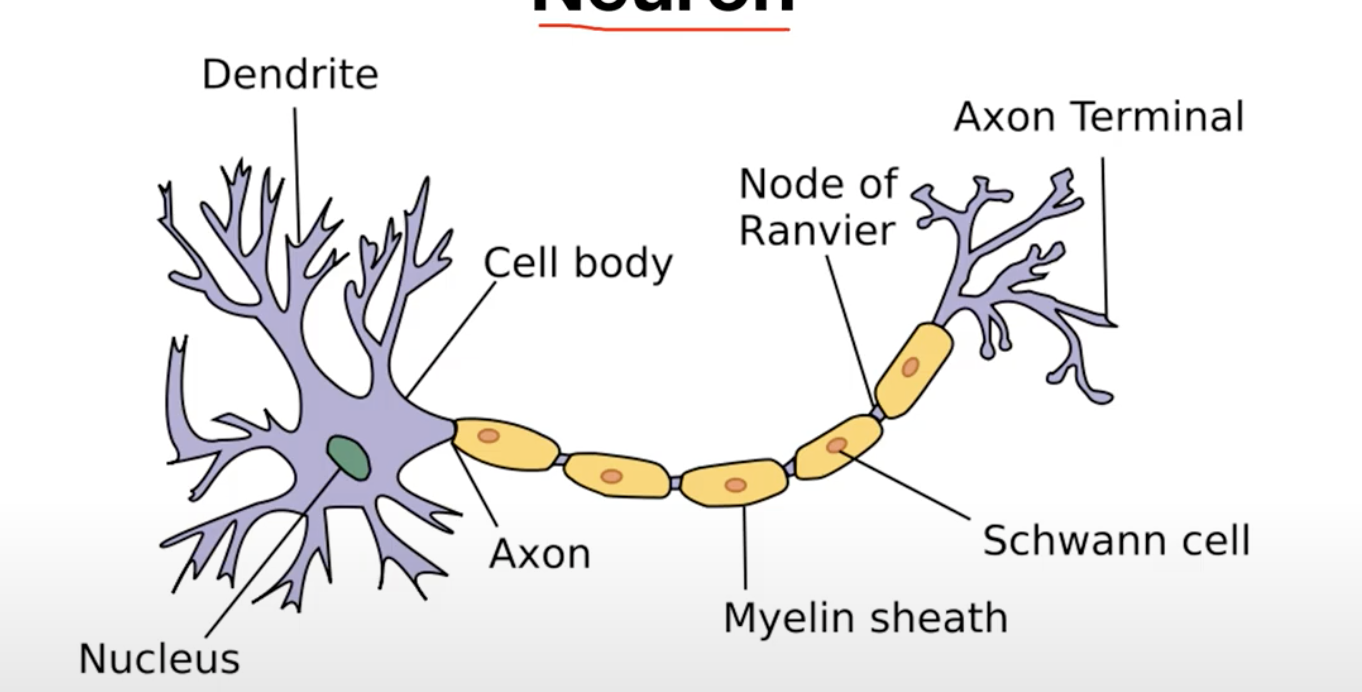

## Perceptron
Perceptron은 x들의 가중치를 곱한 합과 bias를 더해 activation function을 거쳐 output을 만든다.
처음에는 linear classifier를 위해서 만들어졌다.
즉, AND와 OR를 위해서 만들어졌다.  
  
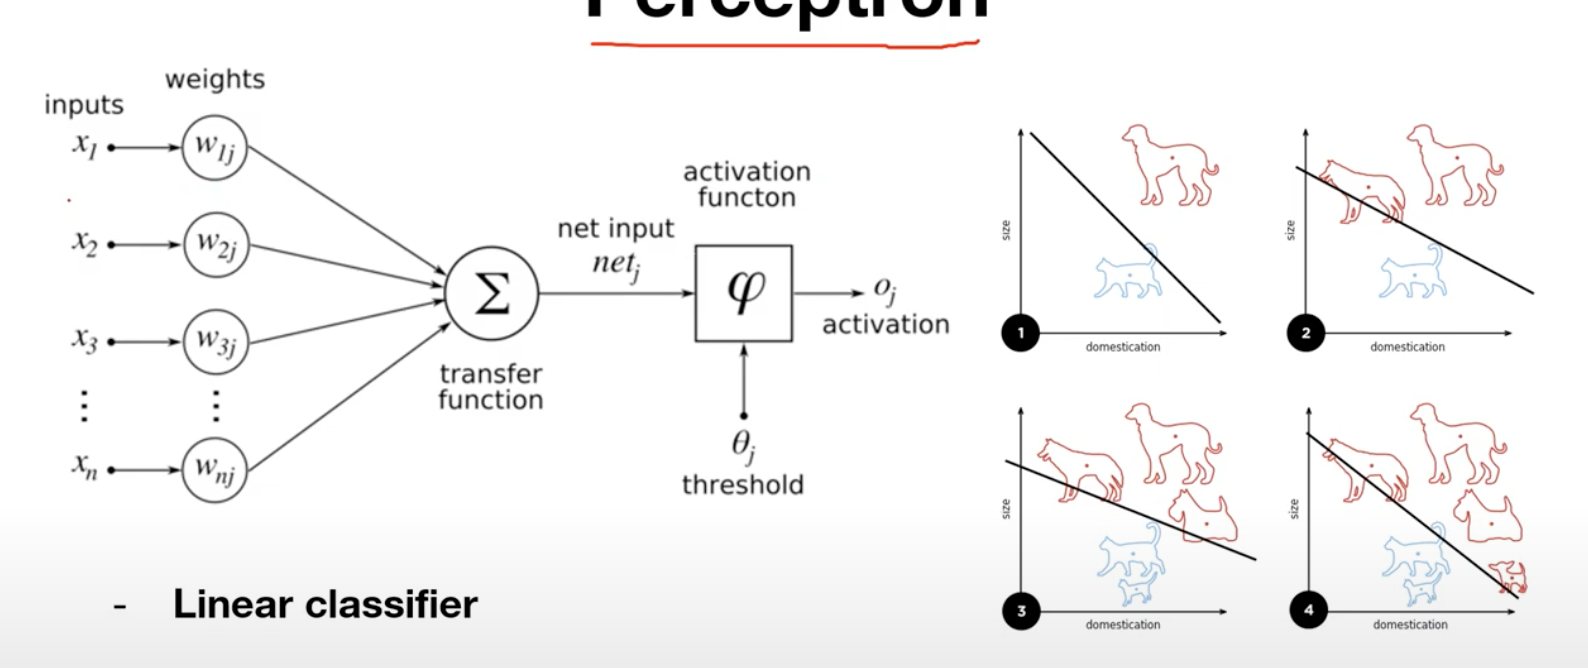

## XOR
그러나 perceptron은 xor을 구현할 수 없다.

In [23]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

# nn Layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid)

nn.BCELoss()는 이진 분류에서 사용하는 cross-entropy 함수이다.

In [24]:
# define cost/loss & opimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [25]:
for step in range(1000 + 1):
    optimizer.zero_grad()
    hypothesis = model(x)
    
    # cost/loss function
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996


In [27]:
# 예측값 확인
with torch.no_grad():
    hypothesis = model(x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()
    
    print("모델의 출력값(Hypothesis):", hypothesis.detach().cpu().numpy())
    print("모델의 에측값(Predicted):", predicted.detach().cpu().numpy())
    print("실제값(Y):", y.cpu().numpy())
    print("정확도(Accuracy):", accuracy.item())

모델의 출력값(Hypothesis): [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 에측값(Predicted): [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy): 0.5


In [28]:
predicted

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [29]:
hypothesis

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])

In [30]:
accuracy

tensor(0.5000)

In [32]:
accuracy.item()

0.5

## Multi Layer Perceptron
Marvin Minsky는 XOR를 해결하기 위해서 MLP가 필요하다고 증명했다. 
여러 개의 층을 갖는 Perceptron을 MLP라고 한다. 
Backpropagation 알고리즘이 개발되면서 MLP가 가능하게 되었다.

### Bak propagation

In [34]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

# nn Layers
w1 = torch.Tensor(2, 2)
b1 = torch.Tensor(2)
w2 = torch.Tensor(2, 1)
b2 = torch.Tensor(1)

In [35]:
def sigmoid(x):
    # sigmoid function
    return 1.0 / (1.0 + torch.exp(-x))
    # return torch.div(torch.tensor(1), torch.add(torch.tensor(1.0), torch.exp(-x)))
    
def sigmoid_prime(x):
    # derivative of the sigmoid function
    return sigmoid(x) * (1 - sigmoid(x))

In [36]:
learning_rate = 1e-5

for step in range(1000 + 1):
    # forward
    l1 = torch.add(torch.matmul(x, w1), b1)
    a1 = sigmoid(l1)
    l2 = torch.add(torch.matmul(a1, w2), b2)
    y_pred = sigmoid(l2)
    
    cost = -torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    
    ## .backward()
    # back prop (chain rule)
    # loss derivative
    d_y_pred = (y_pred - y) / (y_pred * (1.0 - y_pred) + 1e-7)
    
    # layer 2
    d_l2 = d_y_pred * sigmoid_prime(l2)
    d_b2 = d_l2
    d_w2 = torch.matmul(torch.transpose(a1, 0, 1), d_b2)
    
    # layer 1
    d_a1 = torch.matmul(d_b2, torch.transpose(w2, 0, 1))
    d_l1 = d_a1 * sigmoid_prime(l1)
    d_b1 = d_l1
    d_w1 = torch.matmul(torch.transpose(x, 0, 1), d_b1)
    
    ## .step()
    # weight update
    w1 = w1 - learing_rate * d_w1
    b1 = b1 - learning_rate * torch.mean(d_b1, 0)
    w2 = w2 - learning_rate * torch.mean(d_b2, 0)
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.6931471824645996
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996


In [43]:
# 예측값 확인
with torch.no_grad():
    hypothesis = model(x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()
    
    print("모델의 출력값(Hypothesis):", hypothesis.detach().cpu().numpy())
    print("모델의 에측값(Predicted):", predicted.detach().cpu().numpy())
    print("실제값(Y):", y.cpu().numpy())
    print("정확도(Accuracy):", accuracy.item())

모델의 출력값(Hypothesis): [[0.00503042]
 [0.49812078]
 [0.99442273]
 [0.50234056]]
모델의 에측값(Predicted): [[0.]
 [0.]
 [1.]
 [1.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy): 0.5


## XOR-nn

In [45]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

# nn layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)

sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid)

In [46]:
# define cost/lost & optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [47]:
for step in range(1000 + 1):
    optimizer.zero_grad()
    hypothesis = model(x)
    
    # cost/loss function
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.6935256719589233
100 0.6931924819946289
200 0.6931475400924683
300 0.6931040287017822
400 0.6930478811264038
500 0.6929551362991333
600 0.6927589178085327
700 0.6921972036361694
800 0.6895924806594849
900 0.661148190498352
1000 0.3218371272087097


In [48]:
# 예측값 확인
with torch.no_grad():
    hypothesis = model(x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()
    
    print("모델의 출력값(Hypothesis):", hypothesis.detach().cpu().numpy())
    print("모델의 에측값(Predicted):", predicted.detach().cpu().numpy())
    print("실제값(Y):", y.cpu().numpy())
    print("정확도(Accuracy):", accuracy.item())

모델의 출력값(Hypothesis): [[0.28081217]
 [0.7167309 ]
 [0.71404296]
 [0.23674184]]
모델의 에측값(Predicted): [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy): 1.0


### XOR-nn-wide-deep

In [49]:
# nn layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)

In [50]:
for step in range(1000 + 1):
    optimizer.zero_grad()
    hypothesis = model(x)
    
    # cost/loss function
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.31741464138031006
100 0.10202213376760483
200 0.05394532158970833
300 0.035732802003622055
400 0.02646648697555065
500 0.020924553275108337
600 0.01725984551012516
700 0.014665724709630013
800 0.012737060897052288
900 0.011249054223299026
1000 0.010067379102110863


In [51]:
# 예측값 확인
with torch.no_grad():
    hypothesis = model(x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()
    
    print("모델의 출력값(Hypothesis):", hypothesis.detach().cpu().numpy())
    print("모델의 에측값(Predicted):", predicted.detach().cpu().numpy())
    print("실제값(Y):", y.cpu().numpy())
    print("정확도(Accuracy):", accuracy.item())

모델의 출력값(Hypothesis): [[0.00975181]
 [0.99104357]
 [0.98695743]
 [0.00826796]]
모델의 에측값(Predicted): [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y): [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy): 1.0
